In [4]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import importlib.util
import sys
sys.path.append("/Users/chase/Desktop/Tufts/Spring2019/DNN/Project/GAN_for_Synthetic_EEG_Data/code/*")
import matplotlib.pyplot as plt
spec = importlib.util.spec_from_file_location("data_utils", "/Users/chase/Desktop/Tufts/Spring2019/DNN/Project/GAN_for_Synthetic_EEG_Data/code/data_utils.py")
from data_utils import trim_intervals, get_data
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

ModuleNotFoundError: No module named 'data_utils'

## Try to classify left and right hand actions with scikit learn SVM

In [3]:
# keep_channels=['F3', 'C3', 'P3', 'T3']
# keep_channels=['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'A1', 'A2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
keep_channels=['C3']
print(len(keep_channels))
trial_len = 1.5

# X, y = get_data("../data/CLASubjectA1601083StLRHand.mat", trial_len, keep_channels)
X, y = get_data("../data/CLASubjectB1512153StLRHand.mat", trial_len, keep_channels)

X = X[y != 3]
y = y[y != 3]
# 0 is left hand
y[y == 1] = 0
# 1 is right hand
y[y == 2] = 1 
print(X.shape)
interval_len = .45
X = trim_intervals(X, .15, interval_len)

num_channels= len(keep_channels)
d2 = np.ceil(num_channels * interval_len / 0.005).astype(int)
X = X.reshape(642, d2)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
seconds = np.linspace(0, trial_len, d2)
fig, ax = plt.subplots()
print(seconds.shape)
print(np.mean(X_train[y_train==1], axis=0).shape)
ax.plot(seconds, np.mean(X_train[y_train==1], axis=0), color="red", label="right hand")
ax.plot(seconds, np.mean(X_train[y_train==0], axis=0), color="blue", label="left hand")
ax.legend()
plt.xlabel("Time (sec)")
plt.ylabel("ERP")

1


NameError: name 'get_data' is not defined

In [4]:
C = np.linspace(1e-10, 20, 20)
params = {'C':C}
svc = SVC()
svc_gs = GridSearchCV(svc, params, cv=10, return_train_score=True, verbose=2, n_jobs=-1)
res = svc_gs.fit(X_train, y_train)
res1 = pd.DataFrame(res.cv_results_)
columns = ["param_C","mean_test_score", "std_test_score", "mean_train_score", "std_train_score"]
res1.loc[:,columns]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.3s finished
/Users/d_berman/anaconda3/envs/TensorFlow/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
0,1e-10,0.520468,0.002991,0.520468,0.000332
1,1.05263,0.672515,0.044689,1.000000,0.000000
2,2.10526,0.666667,0.041615,1.000000,0.000000
3,3.15789,0.666667,0.041615,1.000000,0.000000
4,4.21053,0.666667,0.041615,1.000000,0.000000
5,5.26316,0.666667,0.041615,1.000000,0.000000
6,6.31579,0.666667,0.041615,1.000000,0.000000
7,7.36842,0.666667,0.041615,1.000000,0.000000
8,8.42105,0.666667,0.041615,1.000000,0.000000
9,9.47368,0.666667,0.041615,1.000000,0.000000


(642, 200)
diff [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
X_fta_norm [[ 640.24        -58.2456446  -148.11657443 ...  -78.03188213
  -148.11657443  -58.2456446 ]
 [  10.56        -89.51562648  -98.80665863 ...  -28.55331096
   -98.80665863  -89.51562648]
 [ -11.44        211.42576939  -31.22399643 ...  -35.85204431
   -31.22399643  211.42576939]
 ...
 [ 215.64       -162.61603518   99.54885718 ... -104.78186848
    99.54885718 -162.61603518]
 [ -30.86       -118.11047755   84.47963945 ...    5.21797175
    84.47963945 -118.11047755]
 [-223.66         79.51627318   37.10858558 ...   25.58640475
    37.10858558   79.51627318]]
Avg [-3.15174706e+01 -2.02258921e+01 -1.61342641e+00  7.54575317e+00
  1.47136601e+01  5.20080048e+00  1.03922119e+01  4.18344642e+00
 -1.37422399e+00 -4.47976113e+00 -3.87498115e+00 -3.65263875e+00
 -2.30116220e-01  5.99648769e-01  8.33536399e-01 -1.26

Text(0, 0.5, 'Amplitude')

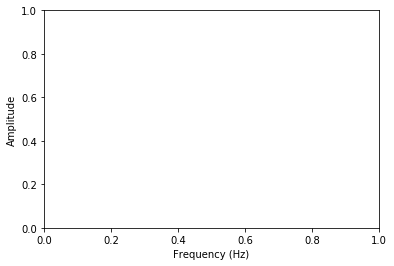

In [5]:
keep_channels=['C3']
orig_interval_len = 1.5
X, y = get_data("../data/CLASubjectB1512153StLRHand.mat", orig_interval_len, keep_channels)
X = X[y != 3]
y = y[y != 3]
# 0 is left hand
y[y == 1] = 0
# 1 is right hand
y[y == 2] = 1 

interval_len = 1.0
offset = .15
X = trim_intervals(X, offset, interval_len)

num_channels= len(keep_channels)
d2 = np.ceil(num_channels * interval_len / 0.005).astype(int)
X = X.reshape(642, d2)
print(X.shape)

# print(X[0,:,5:].shape)

# X_fta = np.real(np.fft.rfftn(X, s=(642, 1, 300), axes=(0,1,2)))
X_fta = np.fft.fft(X)
X_fta_norm = np.fft.fft(X)
X_fta = np.real(X_fta)
X_fta_norm = np.real(X_fta_norm)
print("diff", X_fta - X_fta_norm)
print("X_fta_norm", X_fta_norm)
print("Avg",np.mean(X_fta_norm[y==1], axis=0))


print("X", X.shape)
print("X_fta", X_fta.shape)
frq = np.linspace(0,X_fta.shape[1], num=X_fta.shape[1])
# print(np.mean(X_fta[y==1], axis=0))
print(frq.shape)

ax.plot(frq, np.mean(X_fta[y==1], axis=0), color="red", label="right hand")
# ax.plot(seconds, np.mean(X_fta[y==0], axis=0), color="blue", label="left hand")
ax.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")